In [1]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
d_tr = pd.read_csv('/Users/antirrabia/Documents/01-GitHub/DataMining-_-/CSV/Titanic/train.csv', index_col='PassengerId')
d_te = pd.read_csv('/Users/antirrabia/Documents/01-GitHub/DataMining-_-/CSV/Titanic/test.csv', index_col=0)

### Cleaning and preparing data

In [4]:
data = clean_data(d_tr)
data.sample(7)

,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Survived,Pclass,Age,Fare,Embarked,IsAlone
178,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,2,3.0,1,0.0,1
629,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,3,NaN,0,2.0,1
260,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,3,NaN,0,2.0,1
571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,5.0,3,0.0,0
680,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,3,NaN,1,2.0,1
625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1,5.0,3,0.0,1
17,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,2,NaN,1,0.0,1


### Divining into X, and y

In [5]:
X = data.drop(columns='Survived').copy()
y = data.Survived.copy().astype('int') #To avoid getting an error that 'y' is unknown

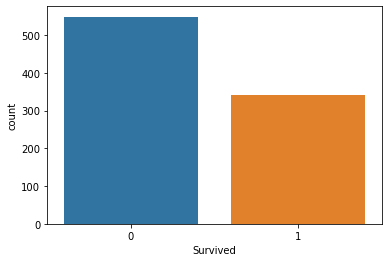

In [8]:
sns.countplot(x=y);

### seeing the percentage of each class

In [12]:
total_0 = y[y==0].value_counts()
total_1 = y[y==1].value_counts()

print('Not survived = {}, ({:.0%}) '.format(total_0[0], total_0[0]/len(y)))
print('Survived     = {}, ({:.0%}) '.format(total_1[1], total_1[1]/len(y)))

Not survived = 549, (62%) 
Survived     = 342, (38%) 


# 💡💡 Training and test set

In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.16)

# LogisticRegression

In [33]:
model = LogisticRegression(max_iter=10000)

imputer = KNNImputer()
#imputer = IterativeImputer(max_iter=20) #default is 10 iteractions
imputer = SimpleImputer()

param_grid = [{ 
              'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'model__penalty': ['l2'],
              'model__C': [0.01, 0.1, 1, 10, 100],
              'model__class_weight' : ['balanced', None],
    
    
              #'impute__imputation_order': ['ascending', 'descending', 'roman', 'arabic', 'random'],
              'impute__n_neighbors': [1,2,3,5,7,11,13,17,19]
              'impute__strategy': ['']
              }]

### ⚡️ Metric

In [31]:
print('regular grid: traing score = {}'.format(gs.best_score_))
gs.best_params_

regular grid: traing score = 0.8163783783783783


{'impute__imputation_order': 'ascending',
 'model__C': 1,
 'model__class_weight': None,
 'model__penalty': 'l2',
 'model__solver': 'newton-cg'}

In [32]:
print('regular grid: test score = {}'.format(accuracy_score(y_te, gs.predict(X_te))))

regular grid: test score = 0.8181818181818182


### ⚡️ metric

In [37]:
print('regular grid: traing score = {}'.format(gs.best_score_))
gs.best_params_

regular grid: traing score = 0.8111111111111111


{'impute__n_neighbors': 17,
 'model__C': 10,
 'model__class_weight': None,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [38]:
print('regular grid: test score = {}'.format(accuracy_score(y_te, gs.predict(X_te))))

regular grid: test score = 0.8391608391608392


# RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_jobs=-1)

#imputer = KNNImputer()
imputer = IterativeImputer(max_iter=20) #default is 10 iteractions

param_grid = [{ # 216 iter in a regular grid search
                'model__criterion' : ["gini", "entropy"],
                'model__n_estimators': [10, 100, 1000],
                'model__max_features': ['sqrt', 'log2'],
                'model__class_weight' : [ None, "balanced", "balanced_subsample"],
    
    
                'impute__imputation_order': ['ascending', 'descending', 'roman', 'arabic', 'random']
                #'impute__n_neighbors': [1,2,3,5,7,11,13,17,19]
               }] 

### ⚡️ metric

In [44]:
print('regular grid: traing score = {}'.format(gs.best_score_))
gs.best_params_

regular grid: traing score = 0.8204564564564565


{'impute__n_neighbors': 1,
 'model__class_weight': 'balanced_subsample',
 'model__criterion': 'entropy',
 'model__max_features': 'log2',
 'model__n_estimators': 1000}

In [45]:
print('regular grid: test score = {}'.format(accuracy_score(y_te, gs.predict(X_te))))

regular grid: test score = 0.8321678321678322


### ⚡️ metric

In [53]:

print('regular grid: traing score = {}'.format(gs.best_score_))
gs.best_params_

regular grid: traing score = 0.8119579579579578


{'impute__imputation_order': 'roman',
 'model__class_weight': None,
 'model__criterion': 'entropy',
 'model__max_features': 'log2',
 'model__n_estimators': 100}

In [54]:
print('regular grid: test score = {}'.format(accuracy_score(y_te, gs.predict(X_te))))

regular grid: test score = 0.8251748251748252


## GradientBoostingClassifier

In [55]:
model = GradientBoostingClassifier()

#imputer = KNNImputer()
imputer = IterativeImputer(max_iter=20) #default is 10 iteractions

param_grid = [{ #regular grid search took about 1 ahour with KNNImputer
            'model__n_estimators': [10, 100, 1000],
            'model__learning_rate': [0.001, 0.01, 0.1],
            'model__subsample': [0.5, 0.7, 1.0],
            'model__max_depth': [3, 7, 9],
    
            'impute__imputation_order': ['ascending', 'descending', 'roman', 'arabic', 'random']
            #'impute__n_neighbors': [1,2,3,5,7,11,13,17,19]
              }]

### ⚡️ metrics

In [48]:
print('regular grid: traing score = {}'.format(gs.best_score_))
gs.best_params_

0.8217597597597597


{'impute__n_neighbors': 3,
 'model__learning_rate': 0.001,
 'model__max_depth': 9,
 'model__n_estimators': 1000,
 'model__subsample': 0.5}

In [ ]:
#with regular grid 0.8461
accuracy_score(y_te, gs.predict(X_te))

### ⚡️⚡️⚡️ metrics ⚡️⚡️⚡️

In [62]:
print('{}'.format(gs.best_score_))
gs.best_params_ #. regular grid and interactived imputer

0.8195435435435434


{'impute__imputation_order': 'arabic',
 'model__learning_rate': 0.01,
 'model__max_depth': 9,
 'model__n_estimators': 100,
 'model__subsample': 0.5}

In [61]:
#. regular grid and interactived imputer
accuracy_score(y_te, gs.predict(X_te))

0.8741258741258742

# BaggingClassifier

In [28]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier())

imputer = KNNImputer()
#imputer = IterativeImputer(max_iter=20) #default is 10 iteractions

param_grid = [{#  *** first change parameters in base_estimator ***
               'model__base_estimator__max_leaf_nodes': [10, 20, 30],
               'model__base_estimator__criterion': ["gini", "entropy"],
    
               'model__n_estimators': [10, 100, 1000],
               
               #'impute__imputation_order': ['ascending', 'descending', 'roman', 'arabic', 'random']
               'impute__n_neighbors': [1,2,3,5,7,11,13,17,19]
               }]

### ⚡️ Metrics

In [24]:
print('{}'.format(gs.best_score_))
gs.best_params_                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

0.8177897897897899


{'impute__imputation_order': 'arabic',
 'model__base_estimator__criterion': 'entropy',
 'model__base_estimator__max_leaf_nodes': 10,
 'model__n_estimators': 100}

In [27]:
accuracy_score(y_te, gs.predict(X_te))

0.8601398601398601

### ⚡️ new metrics

In [37]:
print('{}'.format(gs.best_score_))
gs.best_params_

0.8200000000000001


{'impute__n_neighbors': 2,
 'model__base_estimator__criterion': 'gini',
 'model__base_estimator__max_leaf_nodes': 30,
 'model__n_estimators': 100}

In [38]:
accuracy_score(y_te, gs.predict(X_te))

0.8601398601398601



# PipeLine to impute and modelling

In [50]:
classifier = Pipeline([('impute', imputer), 
                       ('model', model)])

# Tuning Hyperparametres

In [9]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

In [51]:
#gs = RandomizedSearchCV(classifier, param_distributions=param_grid, cv=cv, n_jobs=-1, n_iter=125)
gs = GridSearchCV(classifier, param_grid=param_grid, cv=cv, n_jobs=-1, scoring=None)

In [52]:
gs.fit(X_tr, y_tr)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=Pipeline(steps=[('impute',
                                        IterativeImputer(max_iter=20)),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid=[{'impute__imputation_order': ['ascending',
                                                       'descending', 'roman',
                                                       'arabic', 'random'],
                          'model__class_weight': [None, 'balanced',
                                                  'balanced_subsample'],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_features': ['sqrt', 'log2'],
                          'model__n_estimators': [10, 100, 1000]}])

In [45]:
gs.best_score_

0.8217597597597597

In [46]:
gs.best_params_

{'impute__n_neighbors': 3,
 'model__learning_rate': 0.001,
 'model__max_depth': 9,
 'model__n_estimators': 1000,
 'model__subsample': 0.5}

In [47]:
accuracy_score(y_te, gs.predict(X_te))

0.8461538461538461

# reproducing the best score

In [30]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.16)

In [18]:
impute = IterativeImputer(imputation_order='arabic')
model = GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=100, subsample=0.5)

classifier = Pipeline([('i', impute),
                       ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

score = cross_val_score(classifier, X_tr, y_tr, cv=cv, scoring='accuracy', n_jobs=-1)



# {'impute__imputation_order': 'arabic',
#  'model__learning_rate': 0.01,
#  'model__max_depth': 9,
#  'model__n_estimators': 100,
#  'model__subsample': 0.5}

In [19]:
print('training score: {:.4f}'.format(score.mean()))

training score: 0.8141


In [35]:
classifier.fit(X_tr, y_tr)

Pipeline(steps=[('i', IterativeImputer(imputation_order='arabic')),
                ('m',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=9,
                                            subsample=0.5))])

In [36]:
print('test score: {:.4f}'.format(accuracy_score(y_te, classifier.predict(X_te))) )

test score: 0.8042


## Tools

In [3]:
def Fare(s):
    #s['FareBand'] = pd.qcut(s['Fare'], 4)
    s.loc[ s['Fare'] <= 7.91, 'Fare'] = 0
    s.loc[(s['Fare'] > 7.91) & (s['Fare'] <= 14.454), 'Fare'] = 1
    s.loc[(s['Fare'] > 14.454) & (s['Fare'] <= 31), 'Fare']   = 2
    s.loc[ s['Fare'] > 31, 'Fare'] = 3

    #Cambiar tipo de columna
    s['Fare'] = s['Fare'].astype(int)
    
    return s

def Age(s): #if it uses 2 times it will set all values to 1.0
            #recive a copy
            #does not touch nan values
    s.loc[(s.Age <= 13), 'Age'] = 1
    s.loc[(s.Age > 13) & (s.Age <= 18), 'Age'] = 2
    s.loc[(s.Age > 18) & (s.Age <= 30), 'Age'] = 3
    s.loc[(s.Age > 30) & (s.Age <= 50), 'Age'] = 4
    s.loc[(s.Age > 50), 'Age'] = 5
    
    return s

def FamilySize(s):
    s['FamilySize'] = s['SibSp'] +  s['Parch'] + 1
    
    s['FamilySize'] = s['FamilySize'].astype(int)
    #s['Survived'] = s['Survived'].astype(int)
    
    s['IsAlone'] = 0
    s.loc[s['FamilySize'] == 1, 'IsAlone'] = 1
    
    return s.drop(columns=['SibSp', 'Parch', 'FamilySize']).copy()

def Titles(s):
    #str.extract(' ([A-Za-z]+)\.')
    s['Title'] = s['Name'].str.extract(' ([A-Za-z]+)\.')
    s['Title'] = s['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',                                       
                                    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    s['Title'] = s['Title'].replace(['Mlle', 'Ms'], 'Miss')
    s['Title'] = s['Title'].replace(['Mme'], 'Mrs')
    
    return s.drop(columns='Name').copy()

def SexEmbarkedTitle_to_OneHot(s):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    #s.columns
    
    # ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
    
    cat_features = ['Sex', 'Title']
    res_features = ['Survived', 'Pclass', 'Age', 'Fare', 'Embarked', 'IsAlone']
    
    transformer = ColumnTransformer([('cat', encoder, cat_features)], remainder='passthrough')
    
    transformer.fit(s)
    
    tranformed_names = transformer.named_transformers_['cat'].get_feature_names_out(cat_features)
    #tranformed_names
    
    new_names = np.append(tranformed_names, res_features)
    
    return pd.DataFrame(transformer.transform(s), columns=new_names)


# Para prepara el df para age y embarked prediction

def Age_Embarked(df):

    age_X_te = df.loc[df.Age.isna()].copy()
    embarked_X_te = df.loc[df.Embarked.isna()].copy()

    embarked_X_te.drop(columns=['Embarked'], inplace=True)
    age_X_te.drop(columns=['Age'], inplace=True)


    age_X_tr = df.dropna(subset=['Age', 'Embarked']).copy()
    age_y_tr = age_X_tr.Age


    embarked_X_tr = df.dropna(subset=['Age', 'Embarked']).copy()
    embarked_y_tr = embarked_X_tr.Embarked

    # to leave the df with all columns
    # age_X_tr.drop(columns=['Age'], inplace=True)
    # embarked_X_tr.drop(columns=['Embarked'], inplace=True)
    
    return (age_X_te, embarked_X_te, age_X_tr, age_y_tr, embarked_X_tr, embarked_y_tr)

def get_x_y(df, y):
    #resives an copy of a df and return X_tr, y_tr
    X_tr = df.drop(columns=[y])
    y_tr = df[y]
    
    return X_tr, y_tr



#temp01 = temp01.drop(columns=['Ticket', 'Cabin'])

def clean_data(df=None):
    '''This function uses Title(), Fare(), Age(), FamilySize()
       functions to clean up the Data Fram that it recives.
    '''
    
    d_clean = Titles(df)
    d_clean = Fare(d_clean)
    d_clean = Age(d_clean)
    d_clean = FamilySize(d_clean)

    #OneHot aplied
    d_clean.drop(columns=['Ticket', 'Cabin'], inplace=True)

    d_clean = SexEmbarkedTitle_to_OneHot(d_clean)
    
    d_clean['Embarked'] = d_clean['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2})#.astype(int)
        
    return d_clean


#Converting clean_data(df) function into one that 
#can be used in a pipeline
#cleanDataFrame = FunctionTransformer(clean_data)
